In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import chardet

file_path = "car_purchasing.csv"
with open(file_path, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [3]:
dataset = pd.read_csv(file_path,encoding='ISO-8859-1')
dataset.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
dataset = dataset.drop(['customer name', 'customer e-mail','country','gender','age',
                        'net worth','credit card debt',], axis = 1)
dataset

,annual Salary,car purchase amount
0,62812.09301,35321.45877
1,66646.89292,45115.52566
2,53798.55112,42925.70921
3,79370.03798,67422.36313
4,59729.15130,55915.46248
...,...,...
495,71942.40291,48901.44342
496,56039.49793,31491.41457
497,68888.77805,64147.28888
498,49811.99062,45442.15353


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   annual Salary        500 non-null    float64
 1   car purchase amount  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


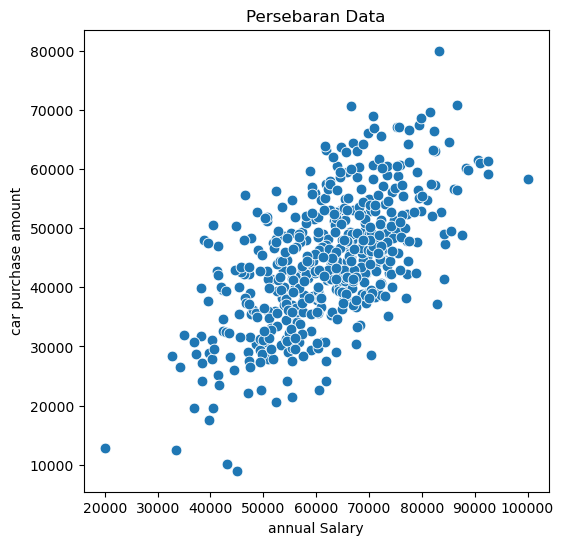

In [7]:
#persebaran data
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'annual Salary', y = 'car purchase amount', data = dataset, s = 60)
plt.title('Persebaran Data')
plt.show()

In [8]:
#Hitung Within Cluster Sum of Squared error (WCSS) untuk tiap kluster yang berbeda

from sklearn.cluster import KMeans

wcss = []
for i in range (1,11):
    kmModel = KMeans(n_clusters = i, n_init = 10)
    kmModel.fit(dataset)
    wcss.append(kmModel.inertia_)

C:\Users\fathirikhsan\Documents\SEMESTER 5\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\fathirikhsan\Documents\SEMESTER 5\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\fathirikhsan\Documents\SEMESTER 5\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\fathirikhsan\Documents\SEMESTER 5\ML\Lib\site-packages\sklearn\c

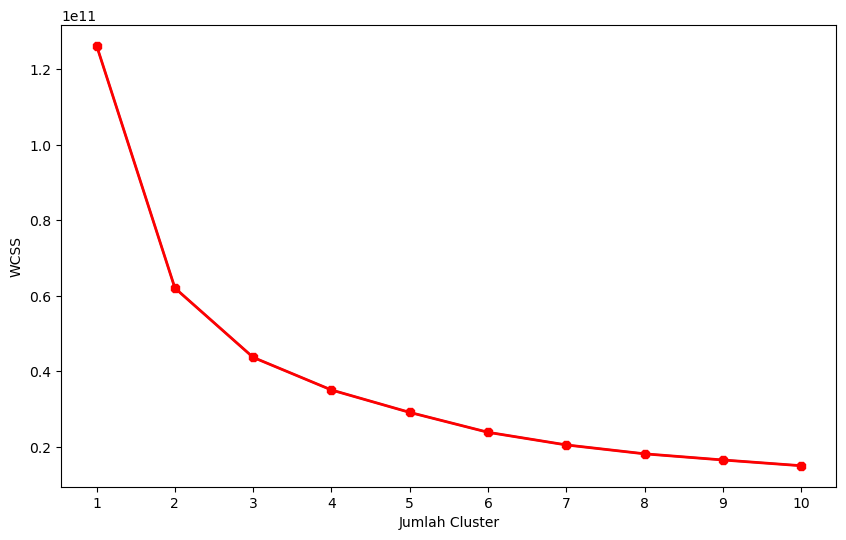

In [9]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel("Jumlah Cluster")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [10]:
# model dengan 5 cluster

kmModelFix = KMeans(n_clusters = 3, n_init = 10) # n_init = 10 / 'auto'
kmModelFix.fit(dataset)

#Memprediksi hasil
hasil_prediksi = kmModelFix.predict(dataset)
print(hasil_prediksi)

C:\Users\fathirikhsan\Documents\SEMESTER 5\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0 0 0 2 0 2 1 0 0 1 2 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 2 2 0 0 1
 1 1 2 0 0 1 1 2 2 1 0 0 2 1 2 0 0 1 0 2 1 1 1 1 0 0 1 1 2 0 0 0 0 1 0 0 0
 2 2 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 2 2 0 2 0 2 1 2 1 0 1 2 2 1 1 1 2 2
 2 2 0 1 2 0 2 1 1 0 0 2 0 0 0 2 0 2 0 2 0 0 0 1 0 0 1 1 1 2 1 0 0 2 0 0 1
 2 0 1 0 0 1 0 1 1 1 0 1 2 0 0 2 0 0 1 1 1 0 0 1 0 2 0 0 0 2 1 1 0 0 1 2 2
 0 1 1 2 1 2 0 0 0 0 0 2 1 0 0 1 0 0 0 0 0 0 2 1 0 0 0 1 0 0 2 0 0 2 1 2 0
 0 2 0 1 0 0 2 0 0 2 0 2 0 2 1 0 0 0 0 0 2 1 2 1 2 2 1 0 0 1 0 1 0 1 2 0 0
 0 2 1 0 1 2 0 1 0 0 2 1 1 2 0 0 0 0 2 0 0 0 0 1 1 2 1 0 0 2 2 0 2 0 0 0 1
 0 1 1 2 2 0 0 2 1 1 2 0 2 0 0 1 1 1 0 2 2 2 0 2 2 0 2 1 0 0 1 1 1 1 1 0 1
 0 2 1 0 1 1 0 1 1 2 2 1 0 1 0 0 0 1 0 2 1 0 2 1 1 2 0 0 2 1 0 0 2 1 0 2 1
 2 0 0 2 2 0 0 0 2 1 0 1 2 1 2 0 1 0 2 1 2 1 0 0 2 1 2 0 0 1 2 0 0 0 2 0 0
 1 2 2 0 0 0 1 1 2 1 0 0 0 2 2 0 2 1 2 1 0 0 0 1 1 0 1 2 1 1 1 0 0 0 1 0 0
 0 2 2 0 0 1 0 2 0 1 0 1 2 0 1 1 1 0 0 2 0 2 1 1 0 1 2 0 0 0 0 2 0 0 1 0 0
 1 0 2 2 1 0 1 0 2 0 2 2 

In [11]:
dataset['Label'] = hasil_prediksi
dataset.head()

,annual Salary,car purchase amount,Label
0,62812.09301,35321.45877,0
1,66646.89292,45115.52566,0
2,53798.55112,42925.70921,0
3,79370.03798,67422.36313,2
4,59729.15130,55915.46248,0


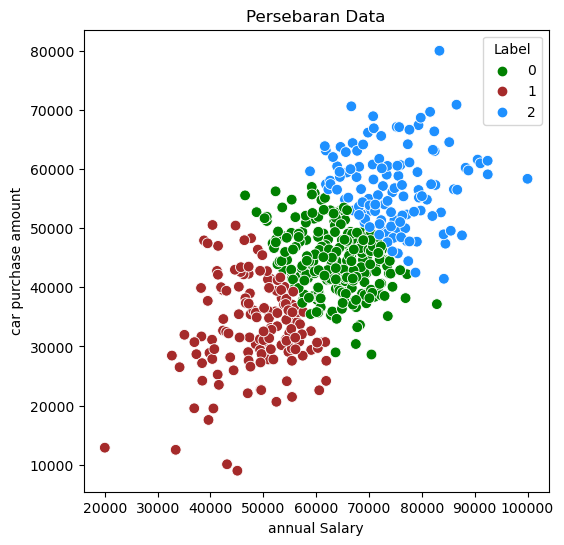

In [12]:
# Persebaran Data berserta Labelnya

plt.figure(figsize = (6,6))
sns.scatterplot(x = 'annual Salary', y = 'car purchase amount', hue = 'Label',
palette = ['green', 'brown', 'dodgerblue'], legend = 'full', data = dataset,
s = 60)
plt.title('Persebaran Data')
plt.show()